<a href="https://colab.research.google.com/github/mertorelio/computer-vision/blob/main/CNN_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet-5

LeNet is a convolutional neural network structure proposed by LeCun in 1998. In general, LeNet refers to LeNet-5 and is a simple convolutional neural network. As a representative of the early convolutional neural network, LeNet possesses the basic units of convolutional neural network, such as convolutional layer, pooling layer and full connection layer, laying a foundation for the future development of convolutional neural network.

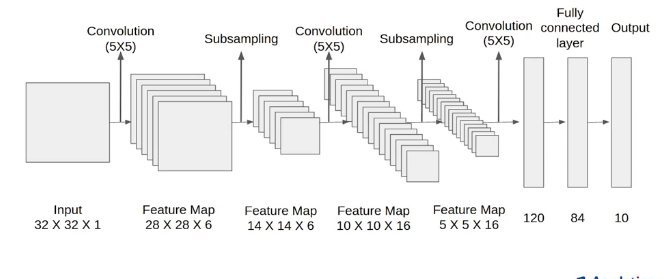

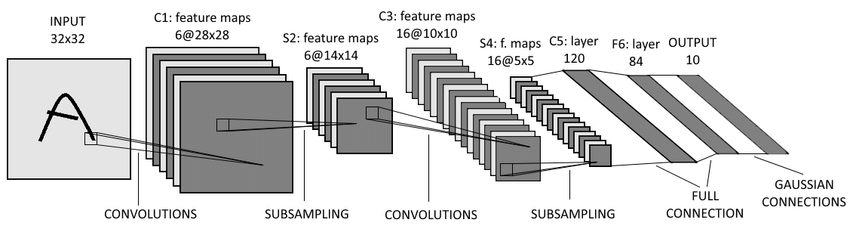

* Number of filters: C1 has 6, C3 has 16, C5 has 120 layers.
* Kernel size: kernel_size = 5x5.
* Pooling Layer: Average Pooling 2x2.
* Activation function: tanH for hidden layers.

## LeNet-5 with Keras

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [2]:
from keras.layers.serialization import activation
lenet_model = Sequential()

#C1 Convolution Layer 
lenet_model.add(Conv2D(filters = 6,kernel_size=5, strides = 1, activation="tanh",
                       input_shape=(28,28,1),padding="same"))

#S2 Pooling Layer
lenet_model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = "valid"))

#C3 Convolution Layer 
lenet_model.add(Conv2D(filters = 16,kernel_size=5, strides = 1, activation="tanh", padding="valid"))

#S4 Pooling Layer
lenet_model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = "valid"))

#C5 Convolution Layer 
lenet_model.add(Conv2D(filters = 120, kernel_size=5, strides = 1, activation="tanh", padding="valid"))

lenet_model.add(Flatten())

#FC6 Fully Connected Layer
lenet_model.add(Dense(units = 84, activation="tanh"))

#FC7 Fully Connected Layer
lenet_model.add(Dense(units = 10, activation="softmax"))

In [3]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

## LeNet-5 with PyTorch

In [4]:
# Importing necessary modules
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

!pip install torchsummaryX --quiet
from torchsummaryX import summary as summaryX
from torchsummary import summary

In [5]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
  
    #C1 Convolution Layer 
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, 
                           kernel_size = 5, stride = 1, padding = 0)
    #C3 Convolution Layer 
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, 
                           kernel_size = 5, stride = 1, padding = 0)
    #C5 Convolution Layer 
    self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, 
                           kernel_size = 5, stride = 1, padding = 0)
    #FC6 Fully Connected Layer
    self.linear1 = nn.Linear(120, 84)
    #FC7 Fully Connected Layer
    self.linear2 = nn.Linear(84, 10)
    self.tanh = nn.Tanh()
    #S2 and S4 Pooling Layer
    self.avgpool = nn.AvgPool2d(kernel_size = 2, stride = 2)

  def forward(self, x):
    x = self.conv1(x)
    x = self.tanh(x)
    x = self.avgpool(x)
    x = self.conv2(x)
    x = self.tanh(x)
    x = self.avgpool(x)
    x = self.conv3(x)
    x = self.tanh(x)
    
    x = x.reshape(x.shape[0], -1)
    x = self.linear1(x)
    x = self.tanh(x)
    x = self.linear2(x)
    return x

model = LeNet()

summary(model, (1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8            [-1, 120, 1, 1]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

# AlexNet

AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton.

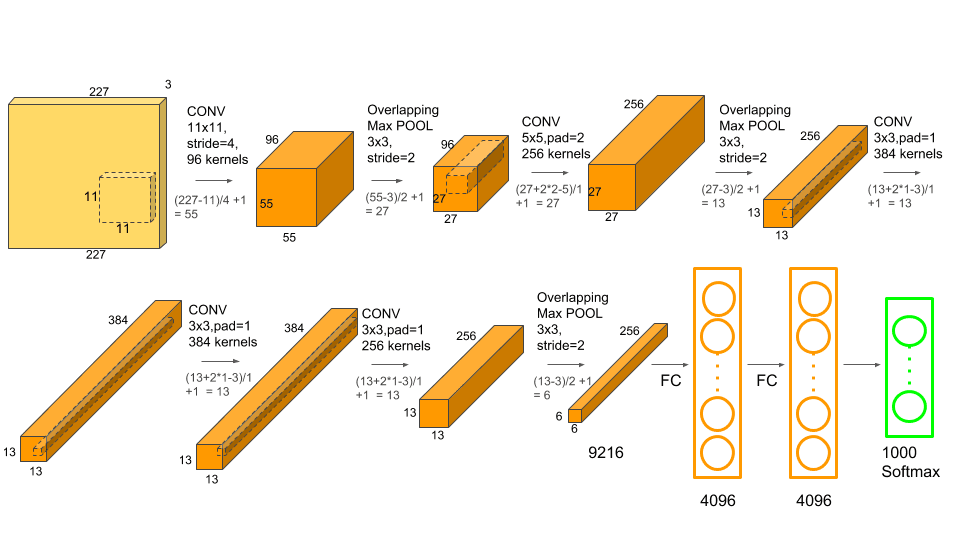

* **Kernel sizes:** 11x11, 5x5, 3x3
* MaxPooling Layes for downsampling
* Dropout Layes to avoid overfitting
* Relu activation functions in hidden layers and softmax for output layer.

### Why we use ReLu?
* Non-linear function.
* It trains much faster.
* Derivative of the sigmoid  becomes very small in the saturating region and the updates applied to the weight almost vanish. **Vanishing Gradient Problem**

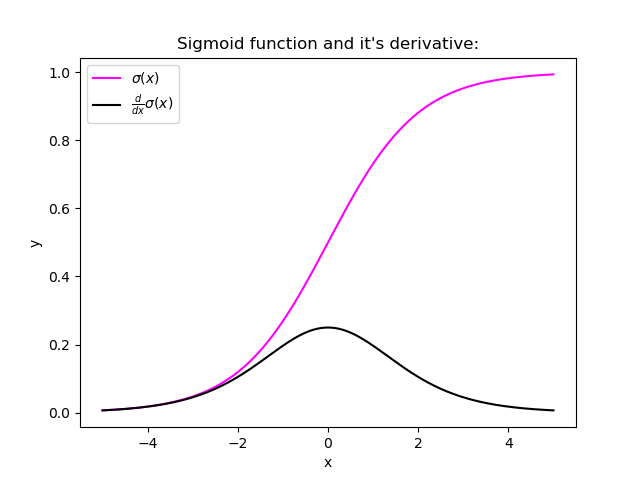

## AlexNet with Keras

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense,Activation,MaxPool2D, BatchNormalization, Dropout
from keras.regularizers import l2

In [7]:
alexNet_model = Sequential()

# 1st layer (conv + pool + batchnorm)
alexNet_model.add(Conv2D(filters= 96, 
                         kernel_size= (11,11), 
                         strides=(4,4), 
                         padding='valid', 
                         kernel_regularizer=l2(0.0005), #l2 regularizer
                         input_shape = (227,227,3)))

alexNet_model.add(Activation('relu'))  #activation function can be added on its own layer
alexNet_model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
alexNet_model.add(BatchNormalization())
    
# 2nd layer (conv + pool + batchnorm)
alexNet_model.add(Conv2D(filters=256,
                 kernel_size=(5,5),
                 strides=(1,1),
                 padding='same',
                 kernel_regularizer=l2(0.0005)))
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
alexNet_model.add(BatchNormalization())
            
# layer 3 (conv + batchnorm)      <--- note that the authors did not add a POOL layer here
alexNet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
alexNet_model.add(Activation('relu'))
alexNet_model.add(BatchNormalization())
        
# layer 4 (conv + batchnorm)      <--- similar to layer 3
alexNet_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
alexNet_model.add(Activation('relu'))
alexNet_model.add(BatchNormalization())
            
# layer 5 (conv + batchnorm)  
alexNet_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
alexNet_model.add(Activation('relu'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten the CNN output to feed it with fully connected layers
alexNet_model.add(Flatten())

# layer 6 (Dense layer + dropout)  
alexNet_model.add(Dense(units = 4096, activation = 'relu'))
alexNet_model.add(Dropout(0.5))

# layer 7 (Dense layers) 
alexNet_model.add(Dense(units = 4096, activation = 'relu'))
alexNet_model.add(Dropout(0.5))
                           
# layer 8 (softmax output layer) 
alexNet_model.add(Dense(units = 1000, activation = 'softmax'))



In [8]:
alexNet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)      

## AlexNet with PyTorch

In [9]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [10]:
alexNet_modelTorch = AlexNet() 

summary(alexNet_modelTorch, (3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
       BatchNorm2d-2           [-1, 96, 55, 55]             192
              ReLU-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
       BatchNorm2d-6          [-1, 256, 27, 27]             512
              ReLU-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
      BatchNorm2d-10          [-1, 384, 13, 13]             768
             ReLU-11          [-1, 384, 13, 13]               0
           Conv2d-12          [-1, 384, 13, 13]       1,327,488
      BatchNorm2d-13          [-1, 384, 13, 13]             768
             ReLU-14          [-1, 384,

Simple usage for PyTorch

In [11]:
import torch
import torch.nn as nn
import torchvision.models as models

alexNet_modelTorch2 = models.alexnet(pretrained=False)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [12]:
summary(alexNet_modelTorch2, (3,227,227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]          23,296
              ReLU-2           [-1, 64, 56, 56]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

Total Params can be different cause in Tensorflow Batch Normalization layers is non-trainable but in PyTorch can be trainable.

# VGGNet 
VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers.
Read more at: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/

**VGG-16**

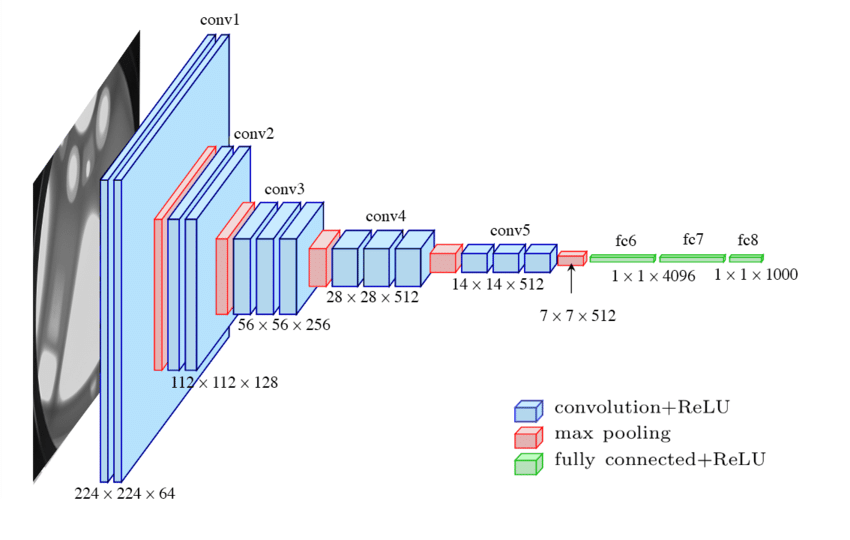

* VGG-16 = 13 Convolutional layers and 3 full connected layers.
* All convolutional layers are 3x3 kernel size
* Strides value 1 and padding value "same".
* All pooling layers 2x2 pool size and strides value is 2.

For regularization:
* L2 Regularization
* Dropout Regularization

## VGGNet with Keras

**You can use like this**: https://keras.io/api/applications/vgg/


```
tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```


```
tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",

```





In [15]:
vgg_16 = Sequential()

# first block
vgg_16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
vgg_16.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# second block
vgg_16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# third block
vgg_16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# forth block
vgg_16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# fifth block
vgg_16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_16.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# sixth block (classifier)
vgg_16.add(Flatten())
vgg_16.add(Dense(4096, activation='relu'))
vgg_16.add(Dropout(0.5))
vgg_16.add(Dense(4096, activation='relu'))
vgg_16.add(Dropout(0.5))
vgg_16.add(Dense(1000, activation='softmax'))

In [16]:
vgg_16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_24 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

**VGG-19**

VGG-19 performs almost same as well as VGG-16 but with more parameters.

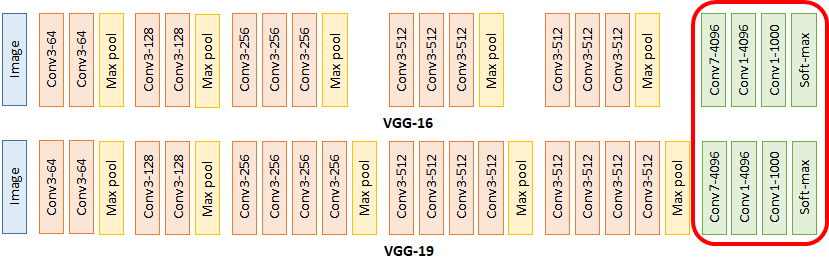

In [17]:
vgg_19 = Sequential()

# first block
vgg_19.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same',input_shape=(224,224, 3)))
vgg_19.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# second block
vgg_19.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# third block
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# forth block
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# fifth block
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
vgg_19.add(MaxPool2D((2,2), strides=(2,2)))

# seventh block (classifier)
vgg_19.add(Flatten())
vgg_19.add(Dense(4096, activation='relu'))
vgg_19.add(Dropout(0.5))
vgg_19.add(Dense(4096, activation='relu'))
vgg_19.add(Dropout(0.5))
vgg_19.add(Dense(1000, activation='softmax'))

In [18]:
vgg_19.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_35 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_37 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

## VGG-Net with PyTorch

In [19]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
        x = self.layer13(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [20]:
vgg16_Torch = VGG16() 

summary(vgg16_Torch, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

Also u can use like this: https://pytorch.org/hub/pytorch_vision_vgg/


```
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg13_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16_bn', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)
model.eval()
```

